In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('data_cardiovascular_risk.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [4]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [5]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [6]:
df['glucose'].value_counts()

glucose
75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: count, Length: 132, dtype: int64

In [7]:
df.glucose.nunique()

132

In [8]:
numerical_df = df.select_dtypes(include=['number'])


In [9]:
corr_matrix = numerical_df.corr()

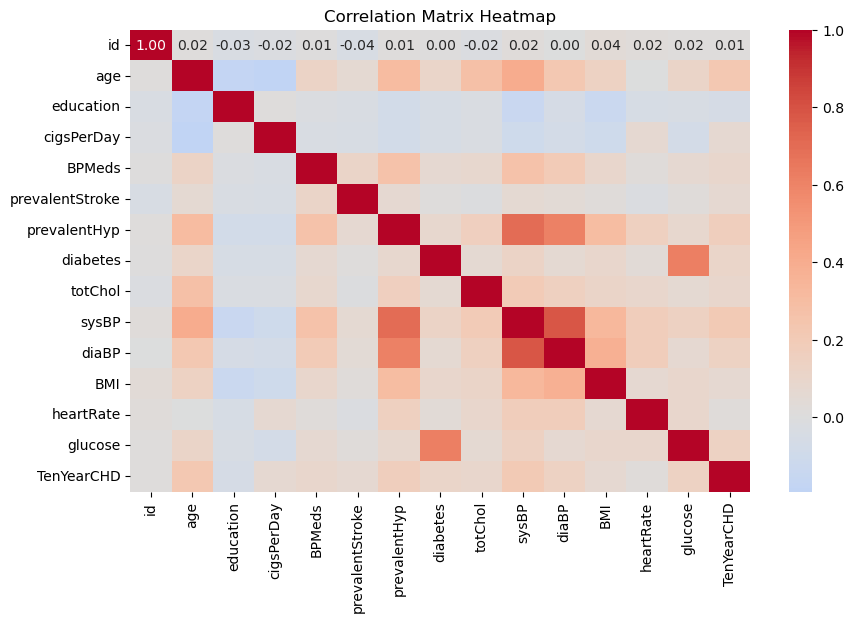

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
corr_matrix 

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


In [12]:
df.dropna()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [13]:
df.shape

(3390, 17)

In [14]:
df.sex=df.sex.apply(lambda x: 1 if x == 'M'  else 0 )

In [15]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [16]:
df.is_smoking=df.is_smoking.apply(lambda x: 1 if x == 'YES' else 0)

In [17]:
df.dropna(inplace=True)

In [18]:
df['Mean_bp'] = df['diaBP'] + 1/3*(df['sysBP'] - df['diaBP'])

In [19]:
df.drop(['sysBP','diaBP'],axis = 1,inplace=True)

In [20]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Mean_bp
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333


In [21]:
X = df.drop(['TenYearCHD','id'],axis=1)
Y =df.TenYearCHD

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    """
    Train, predict, and evaluate a single model.

    Parameters:
    - model: A scikit-learn model object
    - X_train: Training features (scaled)
    - Y_train: Training labels
    - X_test: Test features (scaled)
    - Y_test: Test labels
    """
    
    # Train the model
    model.fit(X_train, Y_train)

    # Predict and evaluate
    predictions = model.predict(X_test)
    model_name = type(model).__name__
    print(f"\n{model_name.replace('Classifier', '').replace('Regressor', '').replace('SVC', 'Support Vector Classifier').replace('Tree', 'Decision Tree').replace('RandomForest', 'Random Forest').replace('LogisticRegression', 'Logistic Regression')}")
    print("Accuracy:", accuracy_score(Y_test, predictions))

    # Generate classification report with macro averaging
    report = classification_report(Y_test, predictions, output_dict=True, zero_division=0)

    # Extract macro-averaged precision and recall
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    #print(classification_report(Y_test, predictions))
    # Print the metrics
    print("Macro Averaged Precision:", precision_macro)
    print("Macro Averaged Recall:", recall_macro)
    print(classification_report(Y_test, predictions))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, predictions)
    print("Confusion Matrix:\n", cm)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define models and their parameters
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'svc': SVC(kernel='poly', random_state=42)
}

# Example usage:
for model_name, model in models.items():
    print(f"Evaluating {model_name.replace('_', ' ').title()}...\n")
    evaluate_model(model, X_train_scaled, Y_train, X_test_scaled, Y_test)


Evaluating Decision Tree...


DecisionDecision Tree
Accuracy: 0.7736063708759955
Macro Averaged Precision: 0.5849666447430236
Macro Averaged Recall: 0.5864085462571903
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       737
           1       0.30      0.31      0.31       142

    accuracy                           0.77       879
   macro avg       0.58      0.59      0.59       879
weighted avg       0.78      0.77      0.77       879

Confusion Matrix:
 [[636 101]
 [ 98  44]]
Evaluating Random Forest...


Random Forest
Accuracy: 0.8339021615472128
Macro Averaged Precision: 0.6087050984936269
Macro Averaged Recall: 0.5143425000477765
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       737
           1       0.38      0.04      0.08       142

    accuracy                           0.83       879
   macro avg       0.61      0.51      0.49       879
weighted avg       0.77      0.

## Hyperparameter Tuning

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid = {
    'class_weight': [ {0: 1, 1: 5}, {0: 1, 1: 6},{0:1,1:10}],  # Example class weights
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6,8,10]
}

In [28]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='recall', 
                           cv=stratified_kfold,  # Number of folds in cross-validation
                           verbose=2, 
                           n_jobs=-1)

In [30]:
grid_search.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 10}],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [31]:
# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict on the test set with the best model
best_rf_model_1 = grid_search.best_estimator_
test_predictions = best_rf_model_1.predict(X_test_scaled)
report = classification_report(Y_test, test_predictions, output_dict=True, zero_division=0)
precision_macro = report['macro avg']['precision']
recall_macro = report['macro avg']['recall']
    #print(classification_report(Y_test, predictions))
    # Print the metrics
accuracy = accuracy_score(Y_test, test_predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Macro Averaged Precision:", precision_macro)
print("Macro Averaged Recall:", recall_macro)
# Print classification report for the test set
print("Classification Report:\n", classification_report(Y_test, test_predictions))
# Confusion Matrix
cm = confusion_matrix(Y_test, test_predictions)
print("Confusion Matrix:\n", cm)

Best Parameters: {'class_weight': {0: 1, 1: 10}, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.5926229508196721
Accuracy: 0.7007963594994312
Macro Averaged Precision: 0.5919350439917471
Macro Averaged Recall: 0.6481692051904371
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       737
           1       0.29      0.57      0.38       142

    accuracy                           0.70       879
   macro avg       0.59      0.65      0.59       879
weighted avg       0.80      0.70      0.73       879

Confusion Matrix:
 [[535 202]
 [ 61  81]]


## Boosting Algorithm with hyper paramerter Tuning

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Define the parameter grid for Grid Search
param_grid = {
    'scale_pos_weight': [1, 2, 4,5,6],  # Adjust class weights
    'n_estimators': [100, 200,300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Initialize Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='recall',  # Use recall as the evaluation metric
                           cv=stratified_kfold,  # Use StratifiedKFold for cross-validation
                           verbose=2, 
                           n_jobs=-1)  # Use all available cores

# Fit Grid Search to the data
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict on the test set with the best model
best_xgb_model = grid_search.best_estimator_
test_predictions = best_xgb_model.predict(X_test_scaled)

# Generate classification report with macro averaging
report = classification_report(Y_test, test_predictions, output_dict=True, zero_division=0)

# Extract macro-averaged precision and recall
precision_macro = report['macro avg']['precision']
recall_macro = report['macro avg']['recall']

# Calculate accuracy
accuracy = accuracy_score(Y_test, test_predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Macro Averaged Precision:", precision_macro)
print("Macro Averaged Recall:", recall_macro)

# Print classification report for the test set
print("Classification Report:\n", classification_report(Y_test, test_predictions))

# Generate and print confusion matrix
cm = confusion_matrix(Y_test, test_predictions)
print("Confusion Matrix:\n", cm)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 6}
Best Score: 0.6192896174863389
Accuracy: 0.6723549488054608
Macro Averaged Precision: 0.5881719950488977
Macro Averaged Recall: 0.6511074588644485
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78       737
           1       0.27      0.62      0.38       142

    accuracy                           0.67       879
   macro avg       0.59      0.65      0.58       879
weighted avg       0.80      0.67      0.71       879

Confusion Matrix:
 [[503 234]
 [ 54  88]]


## SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display class distribution before resampling
print(f"Class distribution before resampling: {Counter(y_train)}")

# Apply SMOTETomek to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after resampling
print(f"Class distribution after resampling: {Counter(y_resampled)}")

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (C:\Users\saikr\anaconda3\Lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
X_train_scaled_sampling = scaler.fit_transform(X_resampled)
X_test_scaled_sampling  = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define models and their parameters
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'svc': SVC(kernel='poly', random_state=42)
}

# Example usage:
for model_name, model in models.items():
    print(f"Evaluating {model_name.replace('_', ' ').title()}...\n")
    evaluate_model(model, X_train_scaled_sampling, y_resampled, X_test_scaled_sampling, y_test)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Function to evaluate XGBoost model
def evaluate_xgboost_model(X_train, y_train, X_test, y_test):
    # Define the XGBoost model
    xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [1, 2, 4]
    }

    # Initialize Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=xgb_model, 
                               param_grid=param_grid, 
                               scoring='recall', 
                               cv=StratifiedKFold(n_splits=5), 
                               verbose=2, 
                               n_jobs=-1)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    
    # Predict on the test set with the best model
    best_xgb_model = grid_search.best_estimator_
    test_predictions = best_xgb_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, test_predictions)
    report = classification_report(y_test, test_predictions, output_dict=True)
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    
    # Print the metrics
    print("Accuracy:", accuracy)
    print("Macro Averaged Precision:", precision_macro)
    print("Macro Averaged Recall:", recall_macro)
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_predictions)
    print("Confusion Matrix:\n", cm)

# Example usage:
evaluate_xgboost_model(X_train_scaled_sampling, y_resampled, X_test_scaled_sampling, y_test)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Split the original data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTETomek to handle class imbalance on the training data only
smotomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotomek.fit_resample(X_train, y_train)

# Function to evaluate XGBoost model
def evaluate_xgboost_model(X_train, y_train, X_test, y_test):
    # Define the XGBoost model
    xgb_model = xgb.XGBClassifier(random_state=42,  eval_metric='logloss')

    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [1, 2, 4]
    }

    # Initialize Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=xgb_model, 
                               param_grid=param_grid, 
                               scoring='recall', 
                               cv=StratifiedKFold(n_splits=5), 
                               verbose=2, 
                               n_jobs=-1)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    
    # Predict on the test set with the best model
    best_xgb_model = grid_search.best_estimator_
    test_predictions = best_xgb_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, test_predictions)
    report = classification_report(y_test, test_predictions, output_dict=True)
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    
    # Print the metrics
    print("Accuracy:", accuracy)
    print("Macro Averaged Precision:", precision_macro)
    print("Macro Averaged Recall:", recall_macro)
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_predictions)
    print("Confusion Matrix:\n", cm)

# Example usage:
evaluate_xgboost_model(X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score

def evaluate_randomforest_model(X_train, y_train, X_test, y_test):
    # Define the RandomForest model
    rf_model = RandomForestClassifier(random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [3, 5, 10, 11, None],
        'class_weight': ['balanced', {0: 1, 1: 1.25}, {0: 1, 1: 1.15}, {0: 1, 1:1.27 }]
    }

    # Define the scorers
    scorers = {
        'recall': make_scorer(recall_score, pos_label=1),
        'accuracy': make_scorer(accuracy_score)
    }

    # Initialize Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=rf_model, 
                               param_grid=param_grid, 
                               scoring=scorers, 
                               refit='recall',  # Refit using recall score
                               cv=StratifiedKFold(n_splits=5), 
                               verbose=2, 
                               n_jobs=-1)

    # Fit the grid search
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score for recall
    print("Best Parameters (Recall):", grid_search.best_params_)
    print("Best Recall Score:", grid_search.best_score_)

    # Predict on the test set with the best model
    best_rf_model = grid_search.best_estimator_
    test_predictions = best_rf_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, test_predictions)
    report = classification_report(y_test, test_predictions, output_dict=True)
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Macro Averaged Precision:", precision_macro)
    print("Macro Averaged Recall:", recall_macro)
    print("Classification Report:\n", classification_report(y_test, test_predictions))

    # Confusion Matrix
    cm = confusion_matrix(y_test, test_predictions)
    print("Confusion Matrix:\n", cm)

# Example usage:
# evaluate_randomforest_model(X_train_resampled, y_train_resampled, X_test, y_test)
evaluate_randomforest_model(X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define models and their parameters
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(random_state=42, max_iter=1000),
    'svc': SVC(kernel='poly', random_state=42)
}

# Example usage:
for model_name, model in models.items():
    print(f"Evaluating {model_name.replace('_', ' ').title()}...\n")
    evaluate_model(model,X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
best_rf_model_1

In [34]:
X_f = df.drop(['TenYearCHD','id'],axis=1)
Y_f =df.TenYearCHD

In [35]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X_f, Y_f, test_size=0.3, random_state=42)

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_f and Y_f are your feature matrix and target vector
# Split the data into training and testing sets
# X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X_f, Y_f, test_size=0.3, random_state=42)

# Define the RandomForest model with the best parameters
best_rf_model_f = RandomForestClassifier(
    class_weight={0: 1, 1: 10},
    max_depth=10,
    min_samples_leaf=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Fit the model to the training data
best_rf_model_f.fit(X_train_f, Y_train_f)

# Predict on the test set
Y_pred = best_rf_model_f.predict(X_test_f)

# Calculate metrics
accuracy = accuracy_score(Y_test_f, Y_pred)
report = classification_report(Y_test_f, Y_pred)
conf_matrix = confusion_matrix(Y_test_f, Y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7007963594994312
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       737
           1       0.29      0.57      0.38       142

    accuracy                           0.70       879
   macro avg       0.59      0.65      0.59       879
weighted avg       0.80      0.70      0.73       879

Confusion Matrix:
 [[535 202]
 [ 61  81]]


In [37]:
import pickle

# Save the model to a file
model_filename = 'Randomforest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_model_f, file)

In [ ]:
!pip install scikit-learn==1.5.0
